# Objective

 - To revise linear models in a regression context
 - To show how linear models could be extended by polynomial features to reduce $E_{\text{training}}$

## Preliminaries

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Linear Regression

Given the numeric outcome $y$, we are interested in predicting this outcome using a linear combination of the inputs $\mathbf{X}$.

Formally, a linear regression model is *parameterized* using $w_i$'s like so:
$$
h(\mathbf{x})= \sum_{i=0}^k w_ix_i
$$

Let us define the error function to be the mean squared error:

$$E_{\text{training}} = \dfrac{1}{N}\sum_{n=1}^n(h(\mathbf{x_n}) - y_n)^2$$ 

In training a linear regression model, we minimize $E_{\text{training}}$ and derive a closed-form solution for the parameters to be $\mathbf{w}=(X^TX)^{-1}X^Ty$

Unfortunately, such closed-form solutions are a rarity in ML. The principle still applies, though. Whatever be the algorithm, the parametrized representation thows up a prediction and we try to minimize $E_{\text{training}}$.

# Example: **Advertising**

## Data

In [ ]:
advertising_df = pd.read_csv("https://raw.githubusercontent.com/nguyen-toan/ISLR/master/dataset/Advertising.csv",
                             index_col=0)

In [ ]:
advertising_df.shape

(200, 4)

## Exploratory

In [ ]:
advertising_X, advertising_y = (advertising_df.drop('Sales', axis=1),
                                advertising_df.Sales)

In [ ]:
advertising_Xtrain, advertising_Xtest, advertising_ytrain, advertising_ytest = train_test_split(advertising_X,
                                                                                                advertising_y,
                                                                                                test_size=0.2,
                                                                                                random_state=20130810)

In [ ]:
advertising_train = pd.concat([advertising_Xtrain, advertising_ytrain],
                              axis=1)

In [ ]:
advertising_train.head()

,TV,Radio,Newspaper,Sales
168,206.8,5.2,19.4,12.2
140,184.9,43.9,1.7,20.7
94,250.9,36.5,72.3,22.2
27,142.9,29.3,12.6,15.0
123,224.0,2.4,15.6,11.6


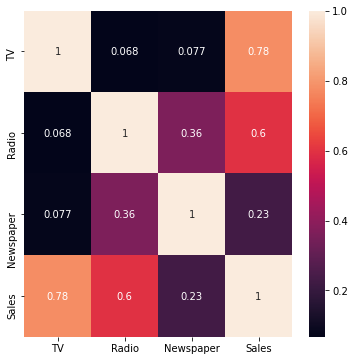

In [ ]:
plt.figure(figsize=(6, 6))
sns.heatmap(advertising_train.corr(), 
            annot=True)

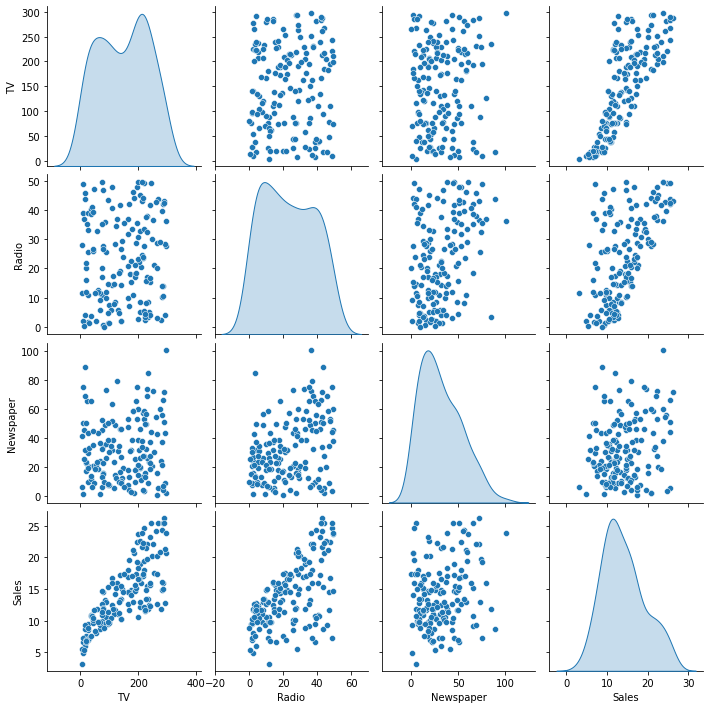

In [ ]:
sns.pairplot(advertising_train, diag_kind='kde')

## Model 1

All features, without data standardization

In [ ]:
advertising_X, advertising_y = (advertising_df.drop('Sales', axis=1),
                                advertising_df.Sales)

In [ ]:
advertising_Xtrain, advertising_Xtest, advertising_ytrain, advertising_ytest = train_test_split(advertising_X,
                                                                                                advertising_y,
                                                                                                test_size=0.2,
                                                                                                random_state=20130810)

In [ ]:
advertising_Xtrain.shape, advertising_Xtest.shape

((160, 3), (40, 3))

In [ ]:
learner_lm = LinearRegression()

In [ ]:
learner_lm.fit(advertising_Xtrain, advertising_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
learner_lm.coef_

array([ 0.0442753 ,  0.1922569 , -0.00694766])

In [ ]:
learner_lm.intercept_

3.302497988256672

Sales = 3.3 + 0.04 $\times$ TV + 0.19 $\times$ Radio - 0.006 $\times$ Newspaper

$R^2$

In [ ]:
learner_lm.score(advertising_Xtrain, advertising_ytrain)

0.9069868193796505

$E_{\text{training}}$

In [ ]:
mean_squared_error(advertising_ytrain,
                   learner_lm.predict(advertising_Xtrain))

2.46052471853952

$E_{out}$

In [ ]:
mean_squared_error(advertising_ytest,
                   learner_lm.predict(advertising_Xtest))

4.250723485238391

## Model 2

All features, with data standardization

In [ ]:
advertising_X, advertising_y = (advertising_df.drop('Sales', axis=1),
                                advertising_df.Sales)

In [ ]:
advertising_Xtrain, advertising_Xtest, advertising_ytrain, advertising_ytest = train_test_split(advertising_X,
                                                                                                advertising_y,
                                                                                                test_size=0.2,
                                                                                                random_state=20130810)

In [ ]:
sc = StandardScaler()

In [ ]:
advertising_scaledXtrain = sc.fit_transform(advertising_Xtrain)
advertising_scaledXtest = sc.transform(advertising_Xtest)

In [ ]:
learner_lm = LinearRegression()

In [ ]:
learner_lm.fit(advertising_scaledXtrain, 
               advertising_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
learner_lm.coef_

array([ 3.83513797,  2.86027458, -0.15048223])

In [ ]:
learner_lm.intercept_

14.065625

Sales = 14.06 + 3.83 $\times$ TV_scaled + 2.86 $\times$ Radio_scaled - 0.15 $\times$ Newspaper_scaled

$ R^2$

In [ ]:
learner_lm.score(advertising_scaledXtrain, advertising_ytrain)

0.9069868193796505

$E_{\text{training}}$

In [ ]:
mean_squared_error(advertising_ytrain,
                   learner_lm.predict(advertising_scaledXtrain))

2.46052471853952

$E_{out}$

In [ ]:
mean_squared_error(advertising_ytest,
                   learner_lm.predict(advertising_scaledXtest))

4.25072348523839

## Model 3

Only TV as a feature

In [ ]:
advertising_X, advertising_y = (advertising_df.drop(['Radio', 'Newspaper','Sales'], 
                                                    axis=1),
                                advertising_df.Sales)

In [ ]:
advertising_Xtrain, advertising_Xtest, advertising_ytrain, advertising_ytest = train_test_split(advertising_X,
                                                                                                advertising_y,
                                                                                                test_size=0.2,
                                                                                                random_state=20130810)

In [ ]:
learner_lm = LinearRegression()

In [ ]:
learner_lm.fit(advertising_Xtrain, advertising_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
learner_lm.coef_

array([0.04637439])

In [ ]:
learner_lm.intercept_

7.213113870446515

Sales = 7.2 + 0.04 $\times$ TV 

$R^2$

In [ ]:
learner_lm.score(advertising_Xtrain, advertising_ytrain)

0.6099749357726039

$E_{\text{training}}$

In [ ]:
mean_squared_error(advertising_ytrain,
                   learner_lm.predict(advertising_Xtrain))

10.317530321842531

## Model 4

Iteratively add features

In [ ]:
feature_sets = [['TV'], 
                ['TV', 'Radio'],
                ['TV', 'Radio', 'Newspaper']]

E_training = []

In [ ]:
for feature_set in feature_sets:

  advertising_X, advertising_y = (advertising_df.loc[:, feature_set],
                                  advertising_df.Sales)
  
  advertising_Xtrain, advertising_Xtest, advertising_ytrain, advertising_ytest = train_test_split(advertising_X,
                                                                                                  advertising_y,
                                                                                                  test_size=0.2,
                                                                                                  random_state=20130810)
  
  learner_lm = LinearRegression()

  learner_lm.fit(advertising_Xtrain, advertising_ytrain)

  E_training.append(mean_squared_error(advertising_ytrain,
                                       learner_lm.predict(advertising_Xtrain)))

$E_{\text{training}}$

In [ ]:
feature_sets

[['TV'], ['TV', 'Radio'], ['TV', 'Radio', 'Newspaper']]

In [ ]:
E_training

[10.317530321842531, 2.4800996104039337, 2.46052471853952]

# Example: **More Advertising**

Linear Regression expects linearity in *parameters*. Other non-linearity is okay.

Ideally, the non-linearity transformation chosen should be driven from theoretical considerations or from business guidance. 

**Don't look at the data to come up with a specific non-linear transformation**. We will see a principled way to come up with non-linear transformations in the next notebook.

## Model 1

In [ ]:
advertising_X, advertising_y = (advertising_df.drop('Sales', axis=1),
                                advertising_df.Sales)

In [ ]:
advertising_Xtrain, advertising_Xtest, advertising_ytrain, advertising_ytest = train_test_split(advertising_X,
                                                                                                advertising_y,
                                                                                                test_size=0.2,
                                                                                                random_state=20130810)

In [ ]:
polynomial_features = PolynomialFeatures(degree=2)

In [ ]:
advertising_Xtrain_poly = polynomial_features.fit_transform(advertising_Xtrain)

In [ ]:
advertising_Xtest_poly = polynomial_features.transform(advertising_Xtest)

In [ ]:
advertising_Xtrain_poly.shape

(160, 10)

In [ ]:
advertising_Xtest_poly.shape

(40, 10)

In [ ]:
learner_lm = LinearRegression(fit_intercept=True)

In [ ]:
learner_lm.fit(advertising_Xtrain_poly, advertising_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
learner_lm.coef_

array([ 0.00000000e+00,  4.73584478e-02,  3.24032002e-02,  3.33854656e-03,
       -9.55623346e-05,  1.04356722e-03, -1.00639150e-05,  2.29013635e-04,
       -1.13109427e-04,  2.86334836e-05])

In [ ]:
learner_lm.intercept_

5.291972781442478

In [ ]:
mean_squared_error(advertising_ytrain,
                   learner_lm.predict(advertising_Xtrain_poly))

0.23206906583604017

In [ ]:
learner_lm = LinearRegression(fit_intercept=False)

In [ ]:
learner_lm.fit(advertising_Xtrain_poly, advertising_ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [ ]:
learner_lm.coef_

array([ 5.29197278e+00,  4.73584478e-02,  3.24032002e-02,  3.33854656e-03,
       -9.55623346e-05,  1.04356722e-03, -1.00639150e-05,  2.29013635e-04,
       -1.13109427e-04,  2.86334836e-05])

In [ ]:
learner_lm.intercept_

0.0

$E_{\text{training}}$

In [ ]:
mean_squared_error(advertising_ytrain,
                   learner_lm.predict(advertising_Xtrain_poly))

0.2320690658360401

## Model 2

In [ ]:
advertising_X, advertising_y = (advertising_df.drop('Sales', axis=1),
                                advertising_df.Sales)

In [ ]:
advertising_Xtrain, advertising_Xtest, advertising_ytrain, advertising_ytest = train_test_split(advertising_X,
                                                                                                advertising_y,
                                                                                                test_size=0.2,
                                                                                                random_state=20130810)

In [ ]:
polynomial_features = PolynomialFeatures(degree=3)

In [ ]:
advertising_Xtrain_poly = polynomial_features.fit_transform(advertising_Xtrain)

In [ ]:
advertising_Xtest_poly = polynomial_features.transform(advertising_Xtest)

In [ ]:
advertising_Xtrain_poly.shape

(160, 20)

In [ ]:
learner_lm = LinearRegression(fit_intercept=False)

In [ ]:
learner_lm.fit(advertising_Xtrain_poly, advertising_ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [ ]:
learner_lm.coef_

array([ 3.90267162e+00,  8.39989317e-02,  5.45422122e-02,  2.14599978e-02,
       -3.76855351e-04,  9.71041932e-04, -9.75075834e-05, -7.98198561e-05,
       -9.87716094e-04,  1.62329013e-04,  6.10797364e-07,  4.66071265e-08,
        1.90073094e-07, -1.25633398e-07,  2.37360672e-06, -8.05303350e-07,
        6.22879909e-06,  4.26503537e-07,  3.52848437e-06, -7.04979378e-07])

In [ ]:
learner_lm.intercept_

0.0

$E_{\text{training}}
$

In [ ]:
mean_squared_error(advertising_ytrain,
                   learner_lm.predict(advertising_Xtrain_poly))

0.13006439044906912

# Example: **Deterministic target**

A stone is thrown horizontally from a cliff of height $h$ with speed $v$. Predict how far the stone will travel till it hits the ground.

In [ ]:
#@title Data
n_samples = 100000
v = np.random.normal(loc=12, scale=3, size=n_samples)
h = np.random.normal(loc=25, scale=5, size=n_samples)

t = np.sqrt(2*h/9.8)

y = v * t

distances_df = pd.DataFrame({'v': v,
                             'h': h,
                             'y': y})

In [ ]:
distances_df.shape

(100000, 3)

In [ ]:
distances_df.sample(5)

,v,h,y
39589,9.367108,25.637436,21.426181
995,21.282884,31.155292,53.665892
94192,7.891514,29.930556,19.503820
17330,15.518951,26.819103,36.306672
29418,14.287794,29.869274,35.276011


In [ ]:
distances_X, distances_y = distances_df.drop('y', axis=1), distances_df.y

In [ ]:
distances_Xtrain, distances_Xtest, distances_ytrain, distances_ytest = train_test_split(distances_X,
                                                                                        distances_y,
                                                                                        test_size=0.2,
                                                                                        random_state=20130810)

In [ ]:
distances_train = pd.concat([distances_Xtrain, distances_ytrain],
                            axis=1)

In [ ]:
distances_train.head()

,v,h,y
68323,16.034680,15.640259,28.647335
11820,7.681719,18.329587,14.857190
24122,13.521542,31.853484,34.475189
94871,13.538315,27.730782,32.206803
76789,13.505482,24.142329,29.977930


## Exploratory

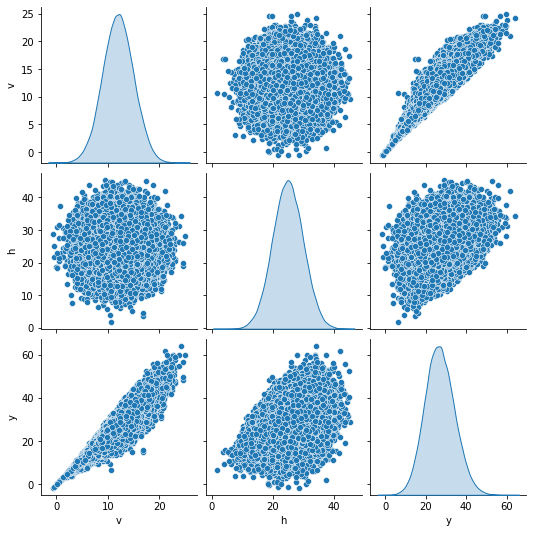

In [ ]:
sns.pairplot(distances_train, 
             diag_kind='kde')

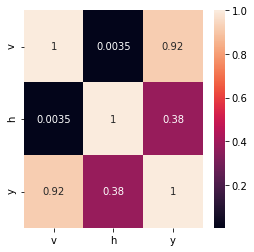

In [ ]:
plt.figure(figsize=(4, 4))
sns.heatmap(distances_train.corr(), annot=True)

## Model 1

In [ ]:
distances_X, distances_y = distances_df.drop('y', axis=1), distances_df.y

In [ ]:
distances_Xtrain, distances_Xtest, distances_ytrain, distances_ytest = train_test_split(distances_X,
                                                                                        distances_y,
                                                                                        test_size=0.2,
                                                                                        random_state=20130810)

In [ ]:
distances_Xtrain.shape

(80000, 2)

In [ ]:
learner_lm = LinearRegression()

In [ ]:
learner_lm.fit(distances_Xtrain, distances_ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
learner_lm.coef_

array([2.24457243, 0.55073172])

In [ ]:
learner_lm.intercept_

-13.737013730785371

y = -13.740 + 2.25 $v$ + 0.55 $h$

$E_{\text{training}}$

In [ ]:
mean_squared_error(distances_ytrain,
                   learner_lm.predict(distances_Xtrain))

0.517100762735254

## Model 2

In [ ]:
distances_X, distances_y = (distances_df.drop('y', axis=1), 
                            distances_df.y)

In [ ]:
distances_Xtrain, distances_Xtest, distances_ytrain, distances_ytest = train_test_split(distances_X,
                                                                                        distances_y,
                                                                                        test_size=0.2,
                                                                                        random_state=20130810)

In [ ]:
polynomial_features = PolynomialFeatures(degree=2)

In [ ]:
distances_Xtrain_poly = polynomial_features.fit_transform(distances_Xtrain)
distances_Xtest_poly = polynomial_features.transform(distances_Xtest)

In [ ]:
distances_Xtrain_poly.shape

(80000, 6)

In [ ]:
learner_lm = LinearRegression(fit_intercept=False)

In [ ]:
learner_lm.fit(distances_Xtrain_poly, distances_ytrain)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [ ]:
learner_lm.coef_

array([-3.53442264e+00,  1.09855950e+00,  2.94753410e-01,  9.05041165e-06,
        4.59354212e-02, -5.89983246e-03])

In [ ]:
learner_lm.intercept_

0.0

$E_{\text{training}}$

In [ ]:
mean_squared_error(distances_ytrain,
                   learner_lm.predict(distances_Xtrain_poly))

0.004705398336872842

Even when the target is deterministic and we have a complex model, it is not necessarily true that the in-sample error will be 0. Note that this is distinct from *noise*, but from a modeling perspective, there is no way we can distinguish noise from insufficient model model complexity.

# Summary

To reduce $E_{\text{training}}$, a good way would be to constantly increase the complexity of the model. 

But this mean that we should always chase the complexity grail where we are constantly driving $E_{\text{training}}$ to 0?